In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
import pickle
from src.utils import get_best_t
from src.utils import get_theory_curves
from src.data_load import load_minimum, collect_minima

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
font = {'family' : 'Arial',
    'weight' : 'medium',
    'size'   : 14,
    'style'  : 'normal'}
matplotlib.rc('font', **font)

In [1]:
from src.infer_density import load_array, extract_minimum_from_slope, compute_theory_minima, compute_log_derivative_from_scaling, fit_T_v0_from_minimum, plot_fit

s_min = 27.93 kb, y_min = -0.843
Best fit: T = 150.0 kb, v0 = 6.50 kb, err = 7.14e-05


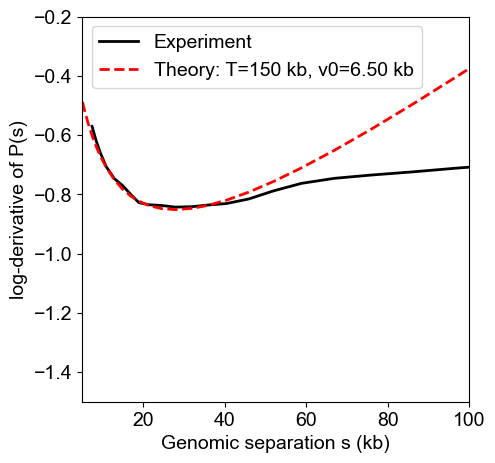

In [4]:
# --- Load your data ---
mids = load_array("../data/abramo_4h_mids.pickle")
scaling = load_array("../data/abramo_4h_scalings.pickle")

# --- Compute slope ---
slope = compute_log_derivative_from_scaling(mids, scaling)

# --- Find experimental minimum ---
s_min, y_min = extract_minimum_from_slope(mids, slope)
print(f"s_min = {s_min:.2f} kb, y_min = {y_min:.3f}")

# --- Generate theoretical grid ---
T_values = np.arange(100, 301, 10)
v0_values = [0.0001, 0.2, 0.4, 0.6, 0.8, 1, 1.5, 2, 2.5, 3, 3.5,
             4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.6,
             10, 10.5, 11, 11.5, 12, 12.5, 13, 14, 15]
minima = compute_theory_minima(T_values, v0_values)

# --- Fit to experimental minimum ---
T_best, v0_best, err = fit_T_v0_from_minimum(s_min, y_min, minima)
print(f"Best fit: T = {T_best:.1f} kb, v0 = {v0_best:.2f} kb, err = {err:.2e}")

# --- Plot comparison ---
plot_fit(mids, slope, T_best, v0_best)

s_min = 27.93 kb, y_min = -0.843
Best fit: T = 150.0 kb, v0 = 6.50 kb, err = 7.14e-05


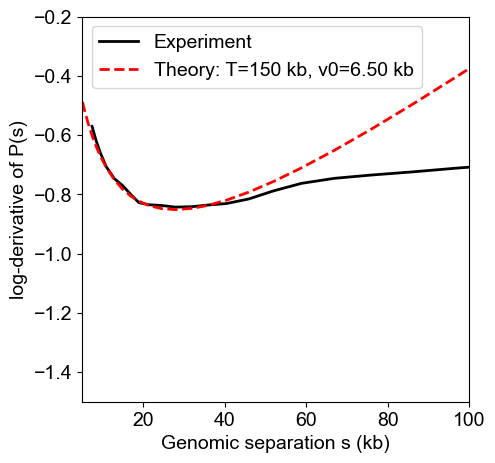

In [5]:
# --- Load your data ---
mids = load_array("../data/full_logder_x_abramo_4h.pickle")
slope = load_array("../data/full_logder_y_abramo_4h.pickle")

# --- Find experimental minimum ---
s_min, y_min = extract_minimum_from_slope(mids, slope)
print(f"s_min = {s_min:.2f} kb, y_min = {y_min:.3f}")

# --- Generate theoretical grid ---
T_values = np.arange(100, 301, 10)
v0_values = [0.0001, 0.2, 0.4, 0.6, 0.8, 1, 1.5, 2, 2.5, 3, 3.5,
             4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.6,
             10, 10.5, 11, 11.5, 12, 12.5, 13, 14, 15]
minima = compute_theory_minima(T_values, v0_values)

# --- Fit to experimental minimum ---
T_best, v0_best, err = fit_T_v0_from_minimum(s_min, y_min, minima)
print(f"Best fit: T = {T_best:.1f} kb, v0 = {v0_best:.2f} kb, err = {err:.2e}")

# --- Plot comparison ---
plot_fit(mids, slope, T_best, v0_best)